1. hmary dataset me boht sa data aisa hota hy jo unusable hota hy mtlb us ka koi role nahi hota.
2. sometime hmary model k coeffiecient(mx+ c me m coeffient hy) heavy ho jaty hyn. or jis ki waja se training   me time lagta. or is waja se prediction me bhi time lgta hy

to hmary model ko improve krne k lye ta ka performance improve ho hum regularization technique ka use 
krty hyn

### Regularization Technique:
    
    - ziyada tar regression me use krty or deep learning me bhi use kr skty hyn.
    - model ko improve krne ka kam krti hy ye technique.
    - it can perform feature selection task. 

improve krne k 2 methods hyn.

1. feature selection
   - hmary data me data(column) unusable bhi ho skta hy. us data ki coefficient ki value boht 
     kam dekhny ko mily  gi. like  y = 500x1 + 200x2 + 0.5x3 + 0.0005x4
is example me dekhy to x4  k coefficient ki value kam mili hy to is ka mtlb is ki importance nahi hy. to is ko remove krne k lye regularization technique ka use krty hyn.
is ka mtlb regularization se hum feature selection ka kam bhi krty hyn.

2. minimize the overfitting
    - sometime hmary regression me coefficient ki value kafi brh jati hy like  
    y = 500x1 + 200x2 + 0.5x3 + 0.0005x4. is me dekhy to x1 and x2 k coefficient ki value boht
    ziyada hy as compared to x3 and x4. to yahan pr regularization in coefficient ki value
    ko reduce krne ka kam bhi krti hy. or is trhan hum overfitting se bach jaty hyn.\
    


Regularization Techniques:
1. Lasso Regularization(L1)  --> feature selection
2. Ridge Regularization(L2)  --> minimize overfitting



In [1]:
from IPython.display import Image

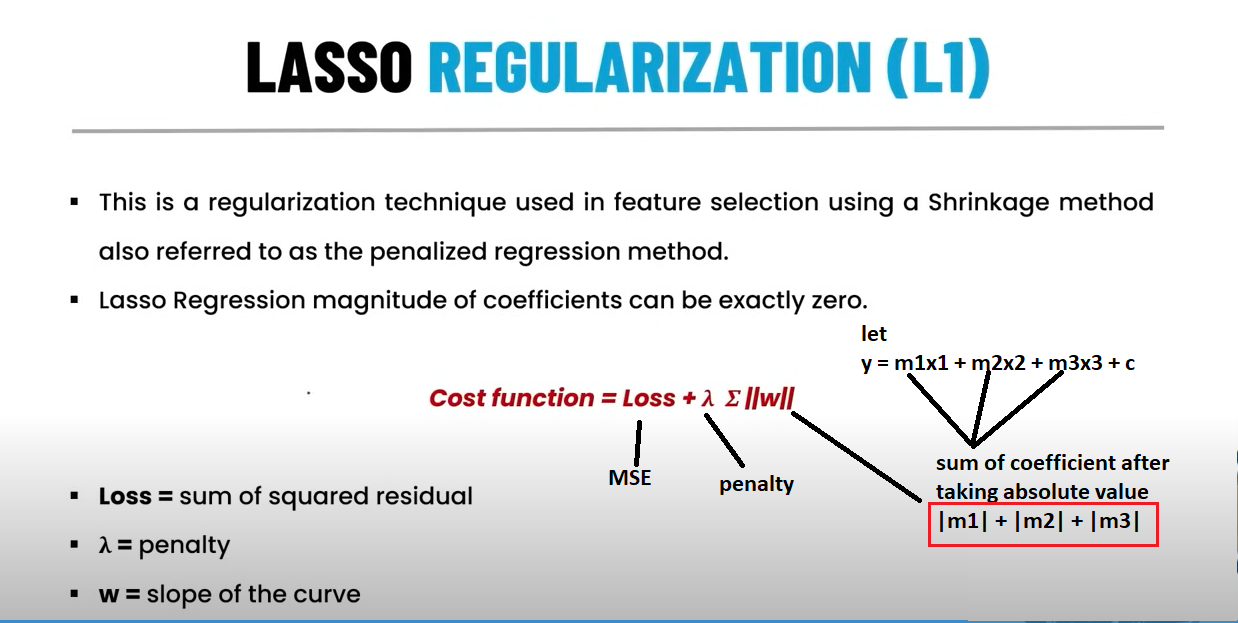

In [4]:
Image(filename="lassoRegularization.png")

jin coefficient ka use hmary model me nahi hy un k coefficient ko exactly zero kr deti hy.
or ye kaam cost function k through krti hy. 

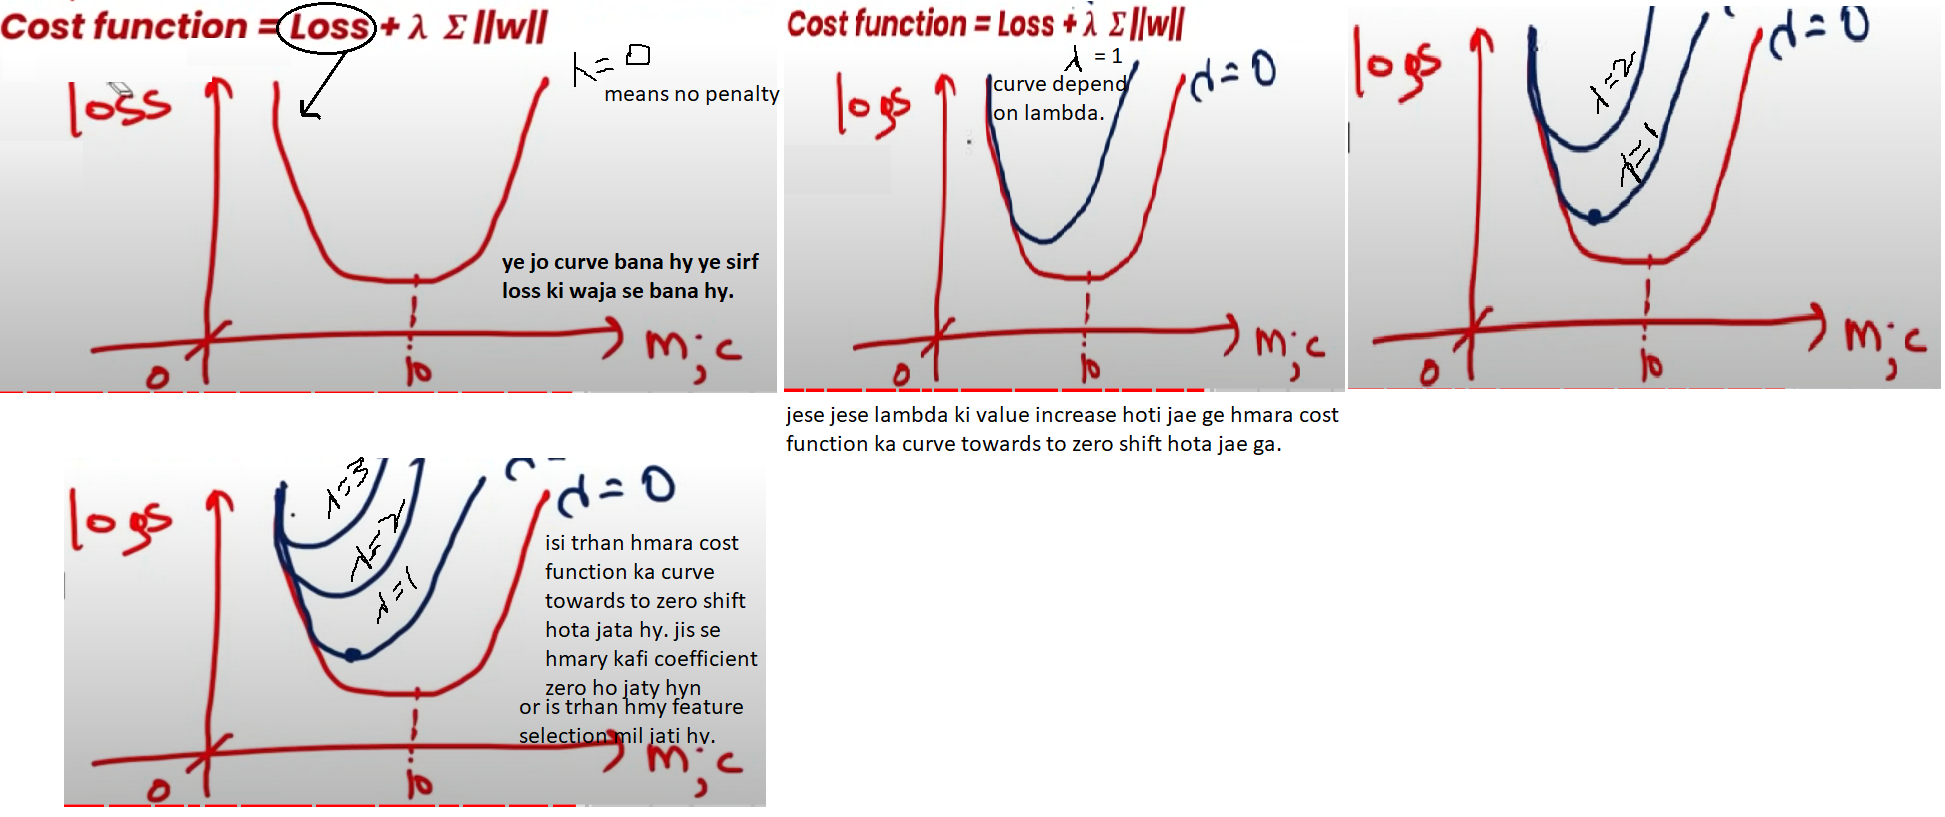

In [5]:
Image(filename="lassoRegularizationdetail.png")

### Ridge Regularization

    -   # overrfitting reducing technique means overfitting ko kam krti hy.
    -   # overfitting ko kam krne ka mtlb ab ye coefficient or constant ki value ko zero nahi kry gi.
    -   # bal k towards to zero krti hy.mtlb k zero k nazdeek ly jati hy. jis se overfitting kam ho jati hy.

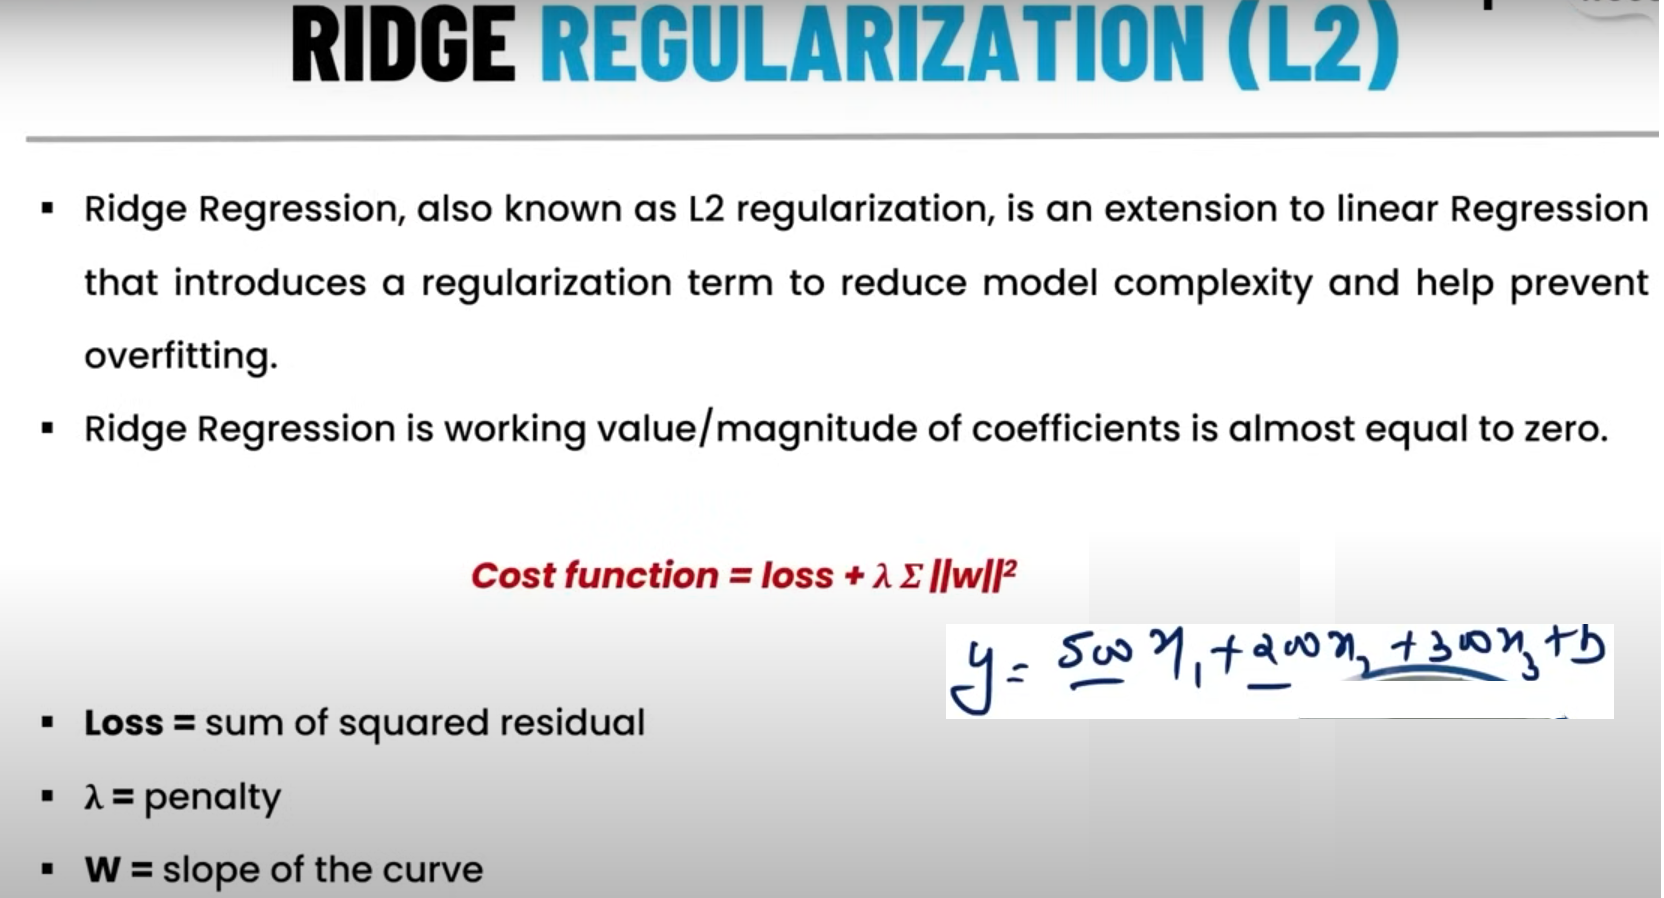

In [8]:
Image(filename="ridgeRegularization.png")

Ab is me coefficient ki values boht ziyada hyn. jis ki waja see overfitting k chance brh jaty hyn.
is lye phr humy coefficient ki value ko reduce krna prta hy. 

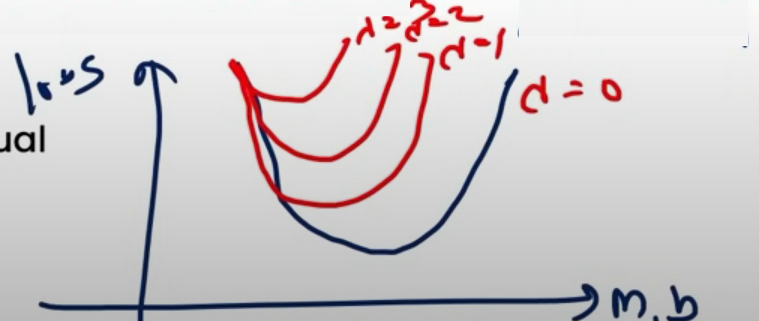

In [10]:
Image(filename="ridgeRegularizationDetail.png")

- is me jese jese penalty add krty jaty hyn cost function ka curve utna he towards zero move krta hy
- or exactly zero nahi hota bal k towards zero hota hy.
- or is trhan hmary coefficient ki values kam ho jati hyn or overfitting k chances bhi kam ho jaty hyn

### Reduce the Computational power:

    -   jab coefficient ki value ziyada ho gi to us time model ko train krne me time ziyada lagy ga.
        or humy high speed computer ki zrorat prti hy.

    -   so ilye coefficient ki value kam hone se computational power bhi kam lagy gi or time bhi.   

### Lasso Rgularization Implementation

In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv("SalaryData.csv")

In [3]:
ds.head(5)

,Age,Years of Experience,Salary
0,32.0,5.0,90000.0
1,28.0,3.0,65000.0
2,45.0,15.0,150000.0
3,36.0,7.0,60000.0
4,52.0,20.0,200000.0


In [14]:
ds.dropna(inplace=True)
ds.isnull().sum()

Age                    0
Years of Experience    0
Salary                 0
dtype: int64

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

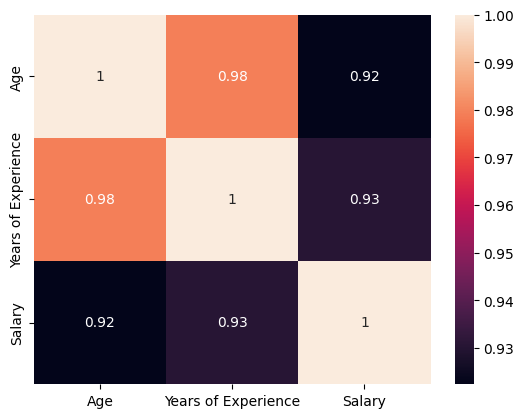

In [6]:
sns.heatmap(ds.corr(), annot=True)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [15]:
x = ds[['Age','Years of Experience']]
y = ds["Salary"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=70)

In [10]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [18]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

90.32753503904277

In [19]:
lr.coef_

array([1830.87471201, 4833.64335427])

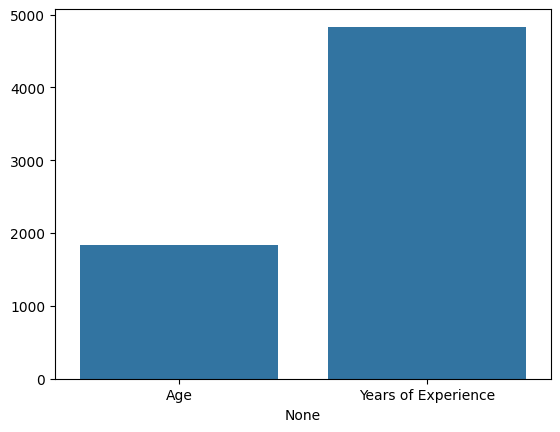

In [31]:
sns.barplot(x=x.columns, y=lr.coef_)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [39]:
lr = Lasso(alpha=0.001)
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)
print(lr.coef_)
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

90.32753507347083
[1830.87574042 4833.64224833]
199521886.95512357
10546.917089948805
14125.221660389036


In [41]:
lr = Lasso(alpha=0.1)
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)
print(lr.coef_)
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

90.32753839816053
[1830.97635073 4833.53402699]
199521818.37401536
10546.919044027081
14125.219232777074


In [40]:
lr = Ridge(alpha=0.1)
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test)*100)
print(lr.coef_)
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test, lr.predict(x_test))))

90.32751341714811
[1831.41550697 4833.03728696]
199522333.6778985
10546.961313808359
14125.237473327608
